In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [111]:
df_test = pd.read_csv("ValidationDataConveyor.csv")
df_train = pd.read_csv("TrainingDataConveyor.csv")

In [87]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data



In [112]:
contamination = "auto"  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train = df_train.drop(["Labels"], axis=1)
X_test = df_test.drop(["Labels"], axis=1)
y_train = df_train.drop(["Labels"], axis=1)
y_train = df_train.drop(["Labels"], axis=1)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [113]:
X_train = df_train.drop(["Labels"], axis=1)
X_test = df_test.drop(["Labels"], axis=1)
y_train = df_train["Labels"]
y_test = df_test["Labels"]

In [125]:
df_float = df_test[["Labels","O_w_BLO_power", "O_w_BHR_power","I_w_HR_Weg", "O_w_HR_power", "I_w_HL_Weg"]]

In [126]:
df_float

,Labels,O_w_BLO_power,O_w_BHR_power,I_w_HR_Weg,O_w_HR_power,I_w_HL_Weg
0,0,27.0,0.0,0.0,11458.0,0.0
1,0,27.0,0.0,0.0,11458.0,0.0
2,0,27.0,0.0,0.0,11458.0,0.0
3,0,27.0,0.0,0.0,11458.0,0.0
4,0,27.0,0.0,0.0,11458.0,0.0
...,...,...,...,...,...,...
2439,0,0.0,0.0,0.0,5322.0,0.0
2440,0,0.0,0.0,0.0,5322.0,0.0
2441,0,0.0,0.0,0.0,5504.0,0.0
2442,0,0.0,0.0,0.0,5504.0,0.0


In [114]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

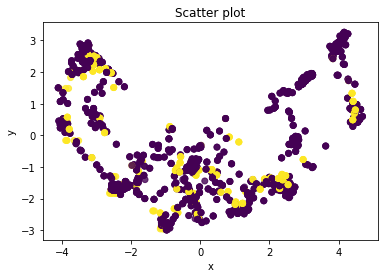

In [116]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_test)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
finalDf = pd.concat([x_pca, y_test], axis = 1)

# Plot
import matplotlib.pyplot as plt
plt.scatter(finalDf["PC1"], finalDf["PC2"], c=finalDf["Labels"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [98]:
finalDf = pd.concat([x_pca, y_test], axis = 1)


In [99]:
finalDf

,PC1,PC2,Labels
0,2.967005,1.662729,0
1,2.968697,1.664373,0
2,2.969804,1.665450,0
3,2.970691,1.666311,0
4,2.971980,1.667564,0
...,...,...,...
2439,4.032949,2.974066,0
2440,4.034117,2.975201,0
2441,4.020889,2.962172,0
2442,4.021795,2.963052,0


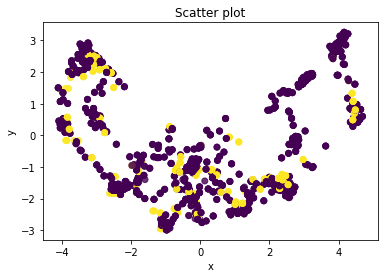

In [101]:
plt.scatter(finalDf["PC1"], finalDf["PC2"], c=finalDf["Labels"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [48]:
clf1 = AutoEncoder(hidden_neurons =[19, 2, 2, 19])
clf1.fit(X_train)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_64 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_65 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_66 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[19, 2, 2, 19],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000029A3C29ACA0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

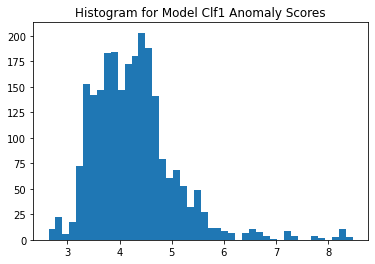

In [49]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [50]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,score
cluster,,,,,,,,,,,,,,,,,,,,
0,0.012086,0.009842,0.008053,0.008206,0.003573,0.010129,0.010539,-0.009383,0.009333,0.008852,-0.0072,0.008052,0.008078,-0.003157,0.000441,-0.075440,-0.003038,0.002319,-0.074334,4.229006
1,-0.808418,-0.658303,-0.538634,-0.548873,-0.238999,-0.677498,-0.704940,0.627630,-0.624292,-0.592090,0.4816,-0.538574,-0.540330,0.211155,-0.029465,5.046088,0.203206,-0.155136,4.972108,7.821806


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_70 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_71 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_72 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)              

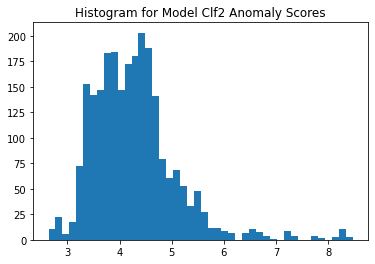

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,score
cluster,,,,,,,,,,,,,,,,,,,,
0,0.012086,0.009842,0.008053,0.008206,0.003573,0.010129,0.010539,-0.009383,0.009333,0.008852,-0.0072,0.008052,0.008078,-0.003157,0.000441,-0.075440,-0.003038,0.002319,-0.074334,4.229001
1,-0.808418,-0.658303,-0.538634,-0.548873,-0.238999,-0.677498,-0.704940,0.627630,-0.624292,-0.592090,0.4816,-0.538574,-0.540330,0.211155,-0.029465,5.046088,0.203206,-0.155136,4.972108,7.821846


In [51]:
clf2 = AutoEncoder(hidden_neurons =[19, 10,2, 10, 19])
clf2.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf2.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_77 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_78 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_79 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 15)              

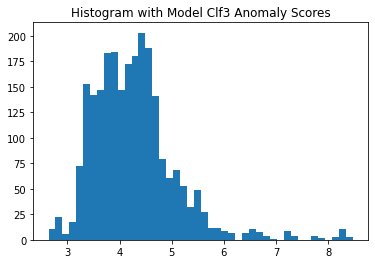

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,score
cluster,,,,,,,,,,,,,,,,,,,,
0,0.012086,0.009842,0.008053,0.008206,0.003573,0.010129,0.010539,-0.009383,0.009333,0.008852,-0.0072,0.008052,0.008078,-0.003157,0.000441,-0.075440,-0.003038,0.002319,-0.074334,4.229005
1,-0.808418,-0.658303,-0.538634,-0.548873,-0.238999,-0.677498,-0.704940,0.627630,-0.624292,-0.592090,0.4816,-0.538574,-0.540330,0.211155,-0.029465,5.046088,0.203206,-0.155136,4.972108,7.821847


In [52]:
# Step 1: Build the model
clf3 = AutoEncoder(hidden_neurons =[19, 15, 10, 2, 10,15, 19])
clf3.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf3.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Step 2: Determine the cut point
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7, 0, 1)
df_test['cluster'].value_counts()

# Step 3: Get the summary statistics by cluster
df_test.groupby('cluster').mean()

In [53]:
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [54]:
from pyod.utils.utility import standardizer
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

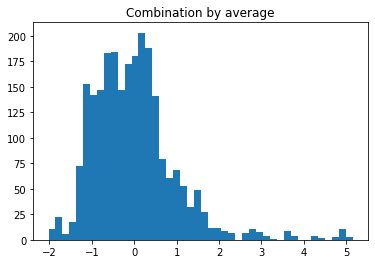

In [55]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [56]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    1335
1    1109
Name: y_by_average_cluster, dtype: int64

In [57]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,,,,,,,,
0,-0.132413,-0.252982,-0.249879,-0.221976,-0.081135,0.405518,0.414348,0.335773,0.242959,0.241497,0.405489,-0.351904,-0.334205,-0.037161,-0.040438,-0.204349,-0.038230,0.145979,-0.200575,-0.667405
1,0.159397,0.304536,0.300801,0.267212,0.097670,-0.488157,-0.498787,-0.404199,-0.292471,-0.290711,-0.488122,0.423618,0.402312,0.044733,0.048679,0.245993,0.046021,-0.175727,0.241450,0.802120


In [58]:
from sklearn.ensemble import IsolationForest

In [61]:
df_train["O_w_BLO_power"]

0        0
1        0
2        0
3        0
4        0
        ..
11014    0
11015    0
11016    0
11017    0
11018    0
Name: O_w_BLO_power, Length: 11019, dtype: int64

In [67]:
def isolation_forest(df,category):
    
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df[category].values.reshape(-1, 1))
    xx = np.linspace(df[category].min(), df[category].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    plt.figure(figsize=(10,4))
    plt.plot(xx, anomaly_score, label='anomaly score')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    plt.legend()
    plt.ylabel('anomaly score')
    plt.xlabel(category)
    plt.show();

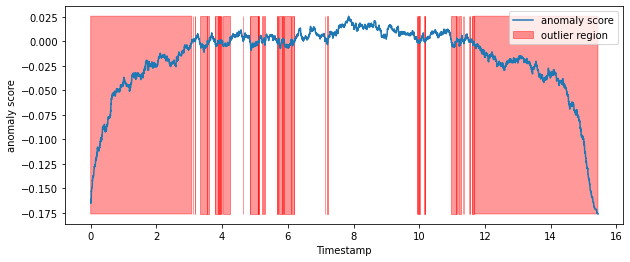

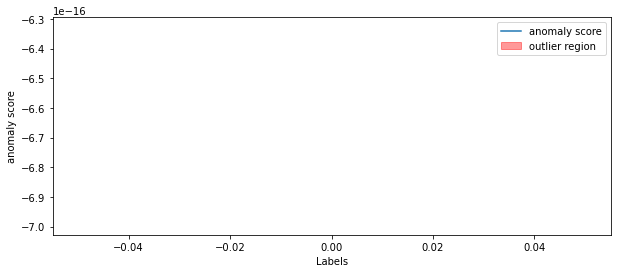

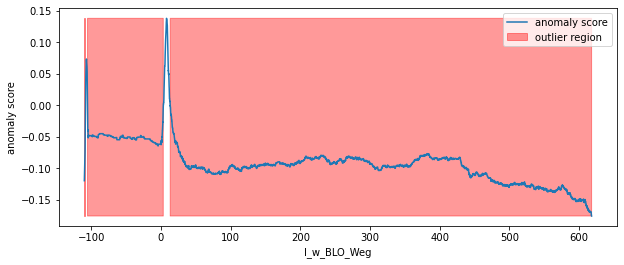

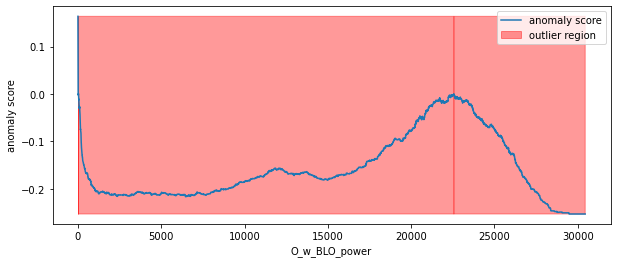

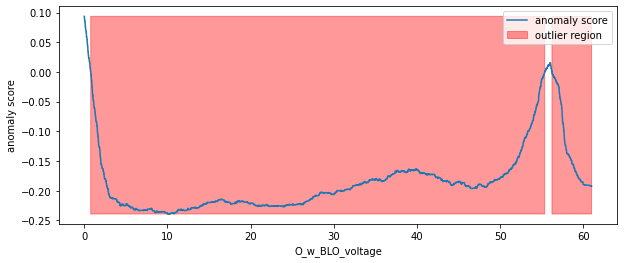

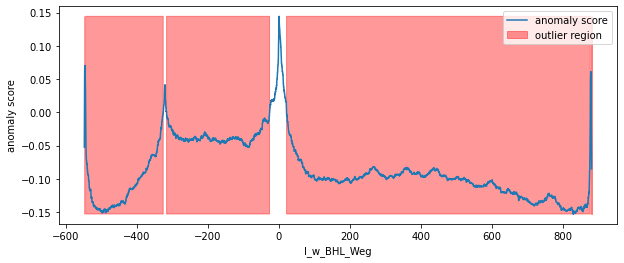

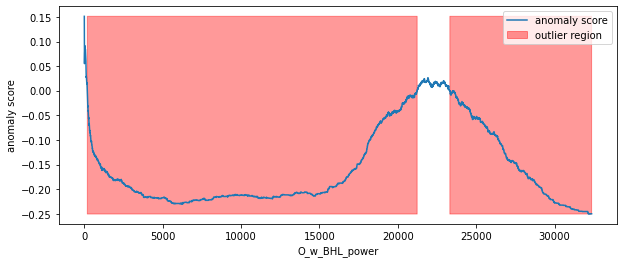

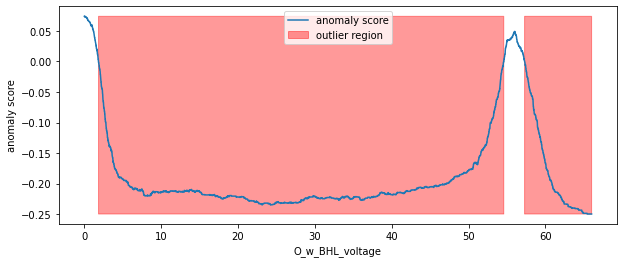

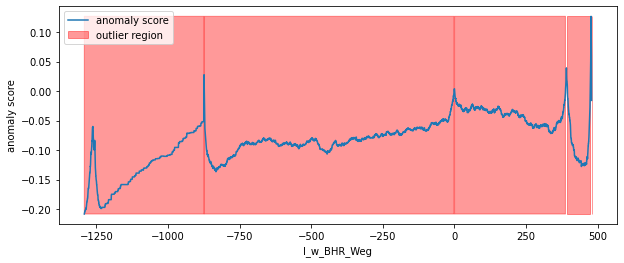

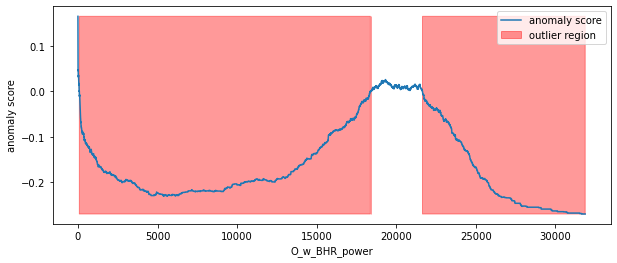

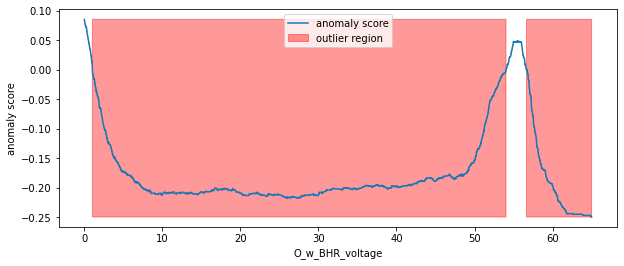

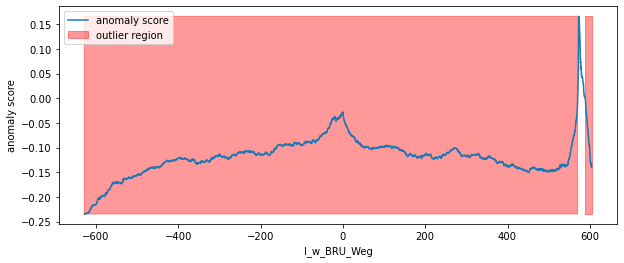

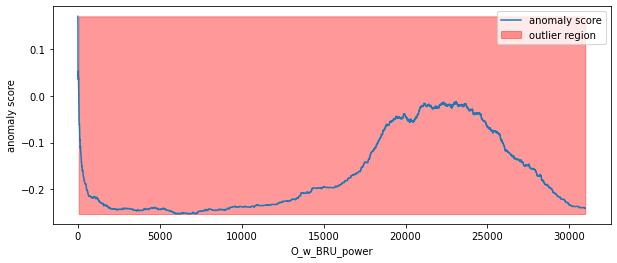

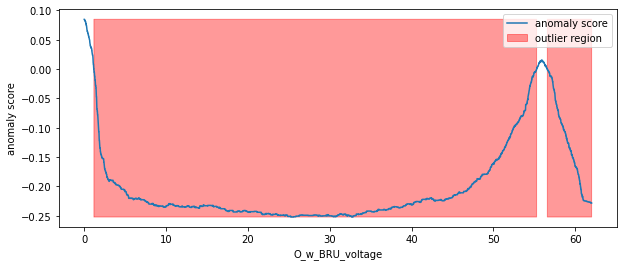

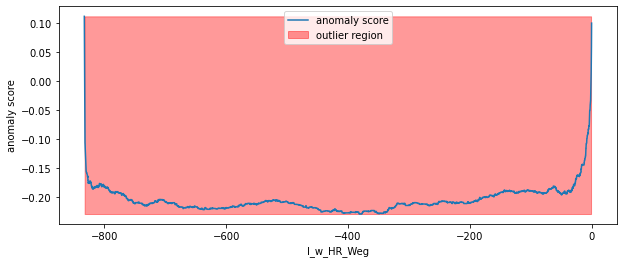

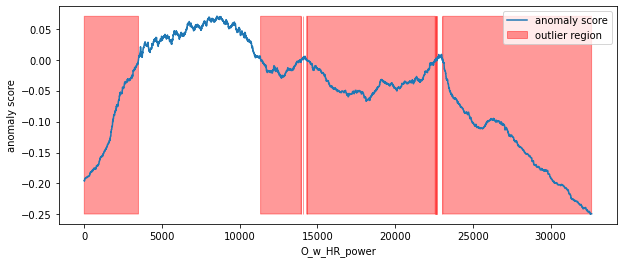

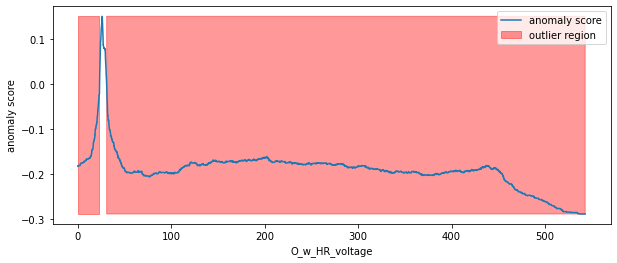

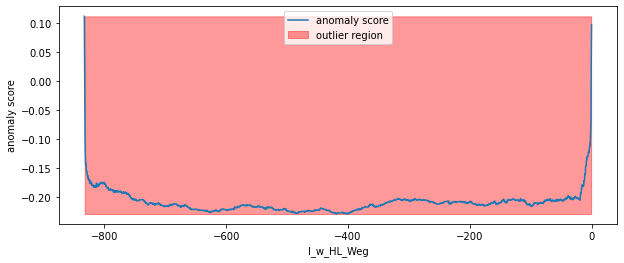

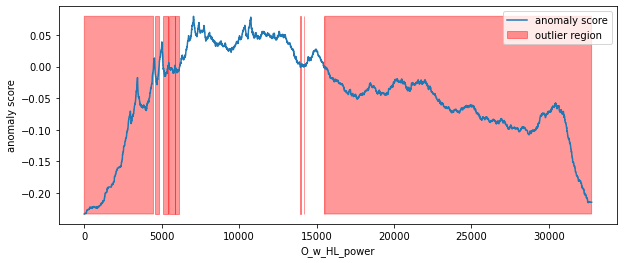

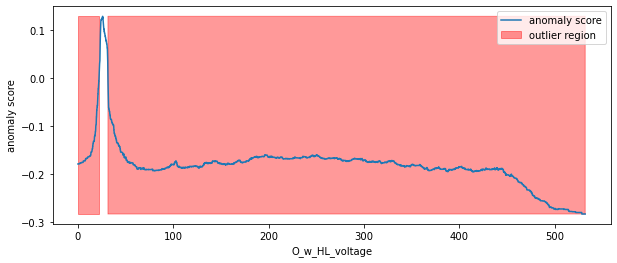

In [69]:
for i in df_train.columns:
    
    isolation_forest(df_train, i)